In [1]:
#Import the Necessary Libraries
import pandas as pd
df=pd.read_csv("train.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [2]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
##Load the data sets- train and test 
from sklearn.model_selection import train_test_split
x=df.drop(columns=['PassengerId','Name','Pclass','Sex'])
y=df['Embarked']
#print(x,y)
x_train,y_train,x_test,y_test=train_test_split(x,y,test_size=0.30,random_state=42)
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

(623, 8) (268, 8)
(623,) (268,)


In [4]:
x_train.head()

,Survived,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
445,1,4.0,0,2,33638,81.8583,A34,S
650,0,NaN,0,0,349221,7.8958,NaN,S
172,1,1.0,1,1,347742,11.1333,NaN,S
450,0,36.0,1,2,C.A. 34651,27.7500,NaN,S
314,0,43.0,1,1,F.C.C. 13529,26.2500,NaN,S


In [5]:
x_train.columns
x_train.columns.tolist()

['Survived', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']

In [6]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

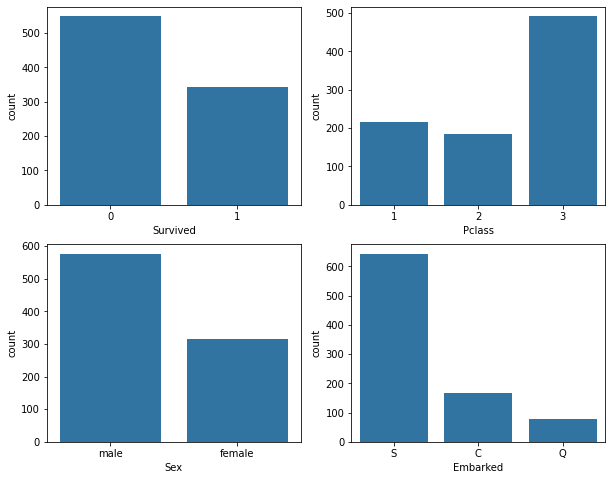

In [7]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
plt.figure(figsize=(10,8))
columns=['Survived','Pclass','Sex','Embarked']
for i,col in enumerate(columns,1):
    plt.subplot(2,2,i)
    sns.countplot(data=df,x=col)
plt.show()

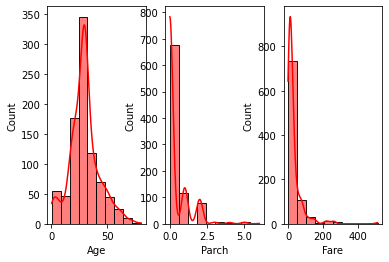

In [8]:
columns=['Age','Parch','Fare']
df['Age'].fillna(df['Age'].mean(),inplace=True)
for i,col in enumerate(columns,1):
    plt.subplot(1,3,i)
    sns.histplot(df[col],bins=10,kde=True,color='red')
plt.show()

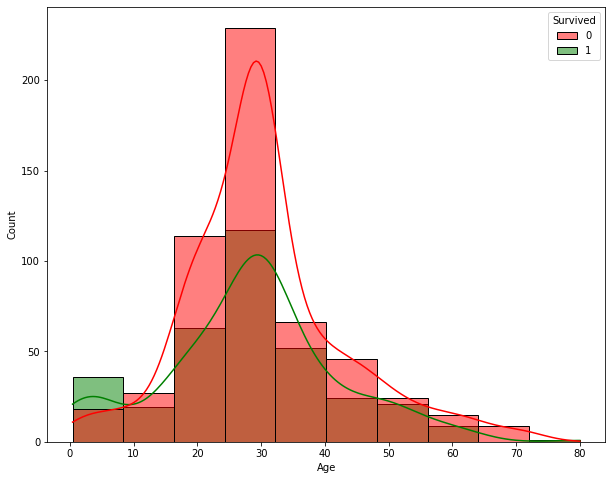

In [9]:
plt.figure(figsize=(10,8))
sns.histplot(data=df,x='Age',hue='Survived',bins=10,kde=True,palette=['red','green'])
plt.show()

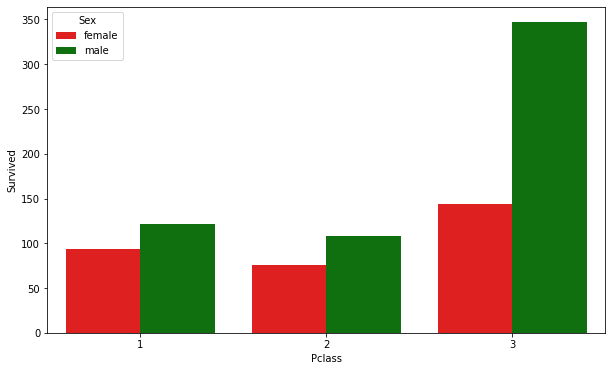

In [10]:
survavival_rate=df.groupby(['Pclass','Sex'])['Survived'].size().reset_index()
plt.figure(figsize=(10,6))
sns.barplot(data=survavival_rate,x='Pclass',y='Survived',hue='Sex',palette=['red','green'])
plt.show()

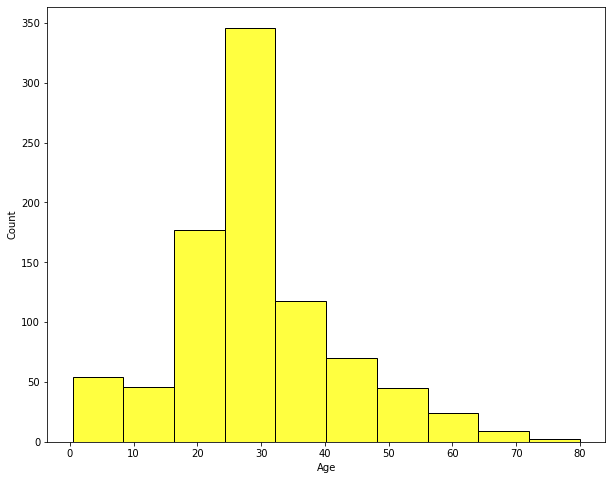

In [11]:
plt.figure(figsize=(10,8))
sns.histplot(df['Age'],bins=10,color='yellow')
plt.show()

In [12]:
df['Embarked'].fillna('S',inplace=True)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C148,C


In [13]:
df['Fare'].fillna(df['Fare'].median(),inplace=True)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C148,C


In [14]:
import numpy as np
import pandas as pd

age_mean=df["Age"].mean()
age_std=df["Age"].std()

num_missing=df["Age"].isnull().sum()
random_ages=np.random.normal(loc=age_mean,scale=age_std,size=num_missing)

df.loc[df["Age"].isnull(),"Age"]=random_ages
print(df["Age"].isnull().sum())

0


In [15]:
df['familysize']=df['SibSp']+df['Parch']+1
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,familysize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


In [16]:
df.drop(columns=['PassengerId','Name','Ticket','Cabin'])

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,familysize
0,0,3,male,22.000000,1,0,7.2500,S,2
1,1,1,female,38.000000,1,0,71.2833,C,2
2,1,3,female,26.000000,0,0,7.9250,S,1
3,1,1,female,35.000000,1,0,53.1000,S,2
4,0,3,male,35.000000,0,0,8.0500,S,1
...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,13.0000,S,1
887,1,1,female,19.000000,0,0,30.0000,S,1
888,0,3,female,29.699118,1,2,23.4500,S,4
889,1,1,male,26.000000,0,0,30.0000,C,1


In [17]:
y=df["Survived"]
x=df.drop(columns=['Survived','Name','PassengerId','Ticket','Cabin'],errors='ignore')
print("features(X):",x.head())
print("Target:",y.head())

features(X):    Pclass     Sex   Age  SibSp  Parch     Fare Embarked  familysize
0       3    male  22.0      1      0   7.2500        S           2
1       1  female  38.0      1      0  71.2833        C           2
2       3  female  26.0      0      0   7.9250        S           1
3       1  female  35.0      1      0  53.1000        S           2
4       3    male  35.0      0      0   8.0500        S           1
Target: 0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64


In [18]:
from sklearn.preprocessing import LabelEncoder
categorical_cols=['Sex','Embarked']

label_encoder={}
for col in categorical_cols:
    label_encoder[col]=LabelEncoder()
    df[col]=label_encoder[col].fit_transform(df[col])
    print(df.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name  Sex   Age  SibSp  Parch  \
0                            Braund, Mr. Owen Harris    1  22.0      1      0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...    0  38.0      1      0   
2                             Heikkinen, Miss. Laina    0  26.0      0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)    0  35.0      1      0   
4                           Allen, Mr. William Henry    1  35.0      0      0   

             Ticket     Fare Cabin Embarked  familysize  
0         A/5 21171   7.2500   NaN        S           2  
1          PC 17599  71.2833   C85        C           2  
2  STON/O2. 3101282   7.9250   NaN        S           1  
3            113803  53.1000  C123        S           2  
4     

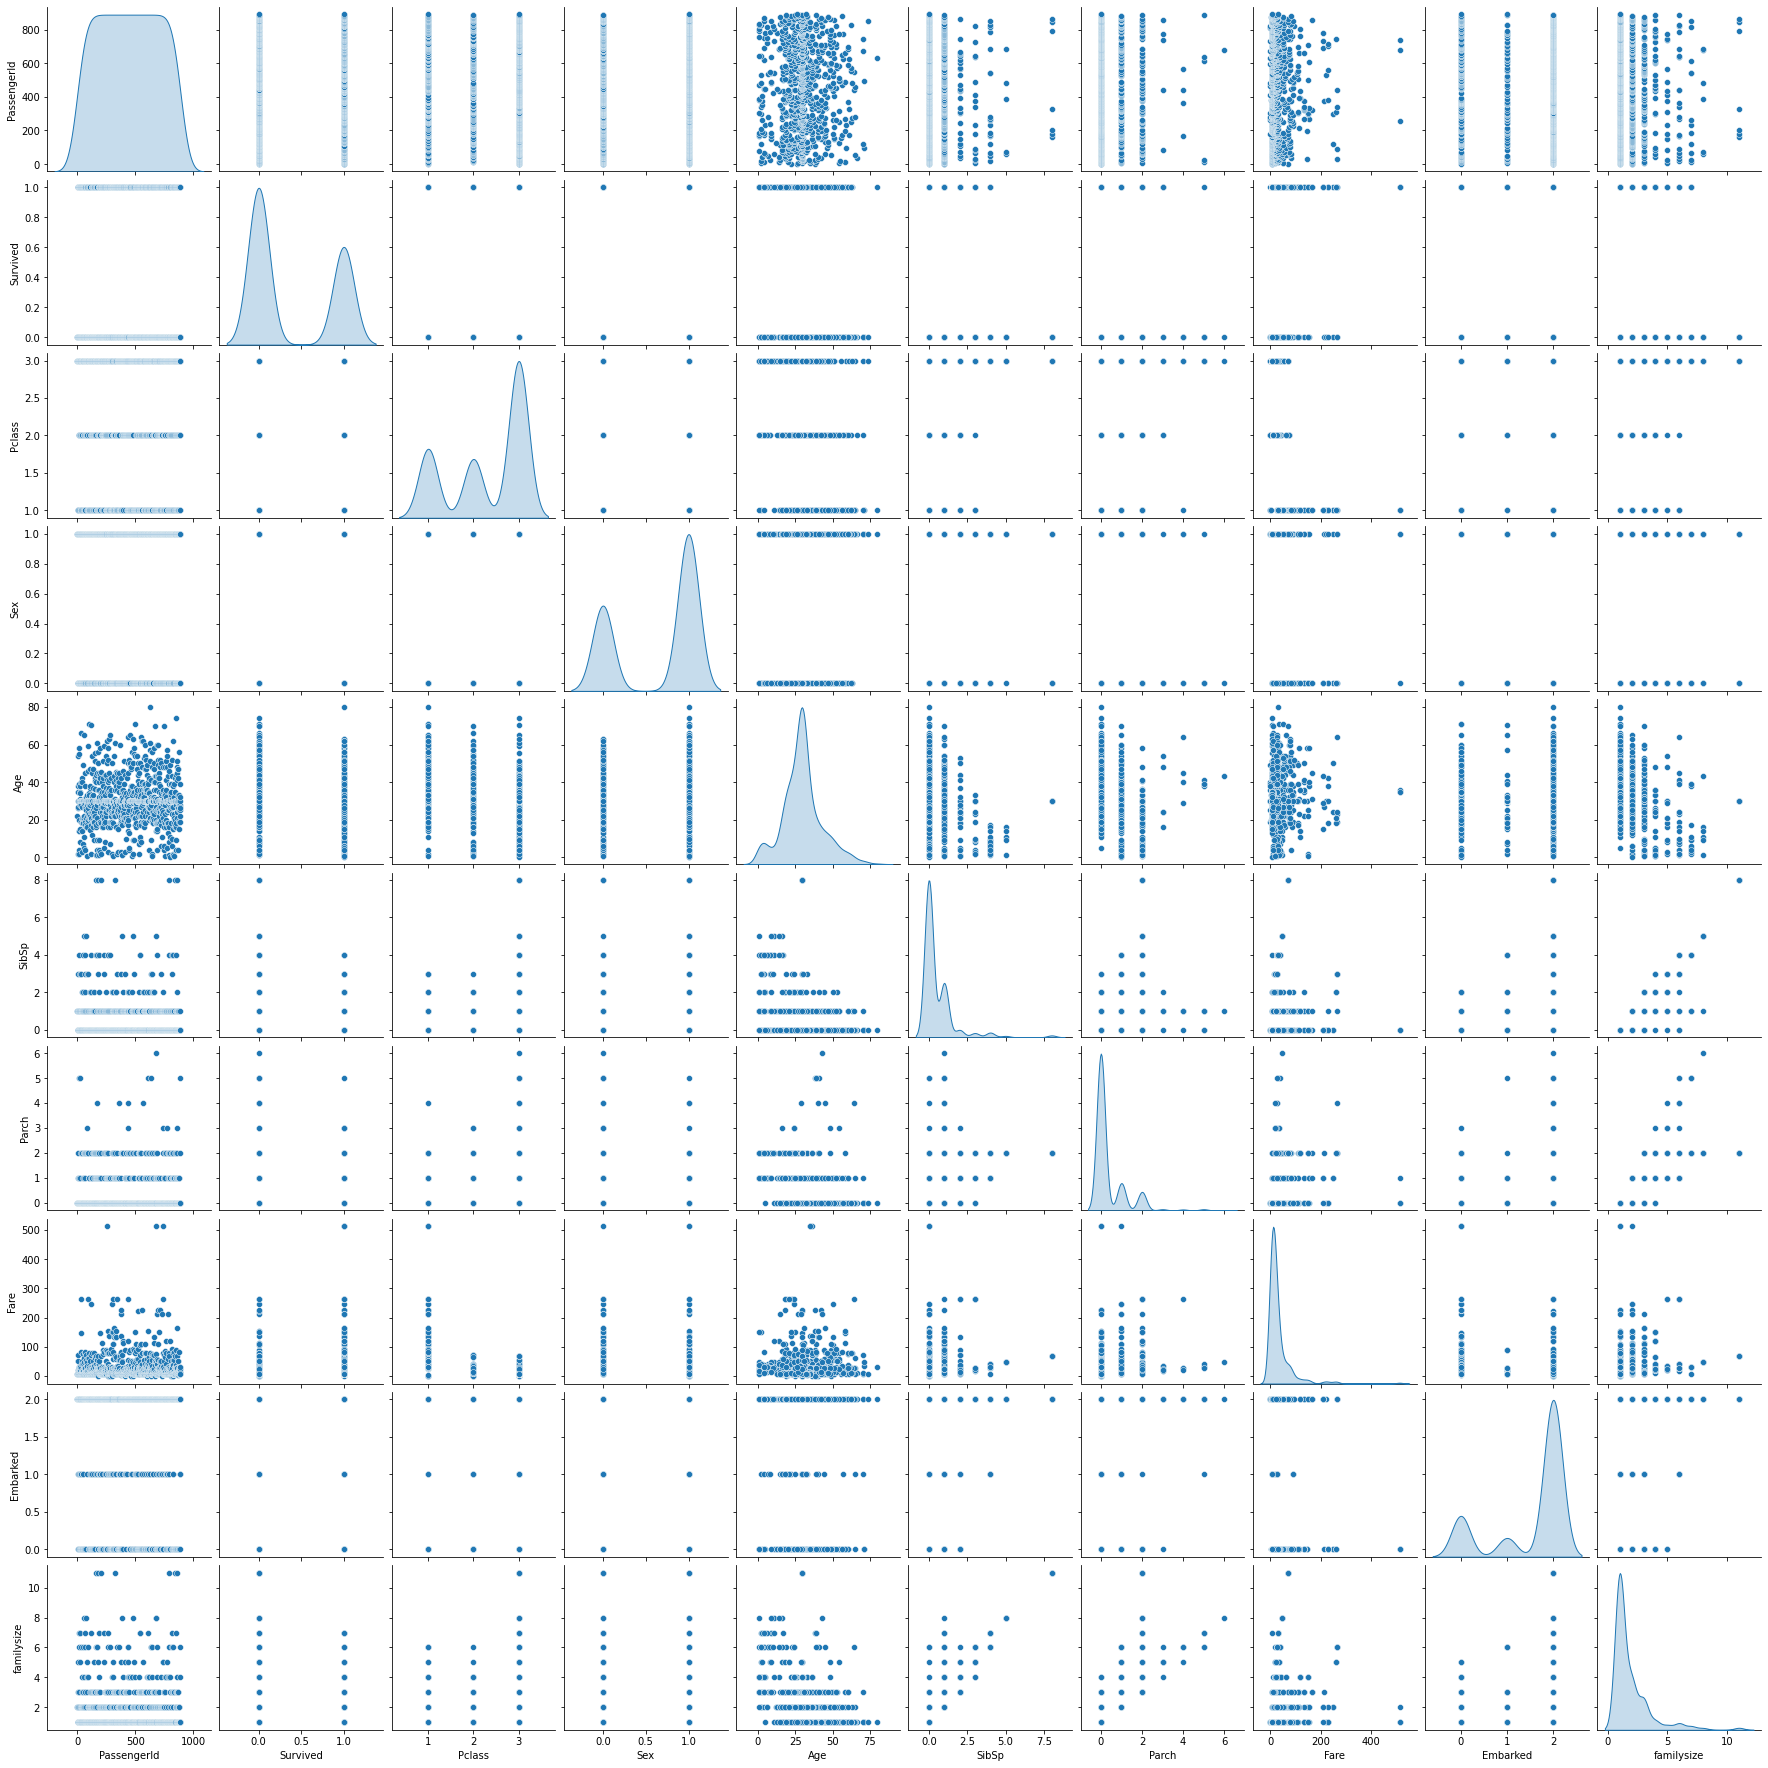

In [19]:
sns.pairplot(df,diag_kind='kde')
plt.show()

In [9]:
from sklearn.model_selection import train_test_split
x=df.drop(columns=['Survived'])
y=df['Survived']
x_train,x_validation,y_train,y_validation=train_test_split(x,y,test_size=0.1,random_state=42)
print(x_train,x_validation)

     PassengerId  Pclass                                             Name  \
165          166       3  Goldsmith, Master. Frank John William "Frankie"   
541          542       3             Andersson, Miss. Ingeborg Constanzia   
625          626       1                            Sutton, Mr. Frederick   
388          389       3                             Sadlier, Mr. Matthew   
76            77       3                                Staneff, Mr. Ivan   
..           ...     ...                                              ...   
106          107       3                 Salkjelsvik, Miss. Anna Kristine   
270          271       1                            Cairns, Mr. Alexander   
860          861       3                          Hansen, Mr. Claus Peter   
435          436       1                        Carter, Miss. Lucile Polk   
102          103       1                        White, Mr. Richard Frasar   

        Sex   Age  SibSp  Parch  Ticket      Fare    Cabin Embarked  
165  

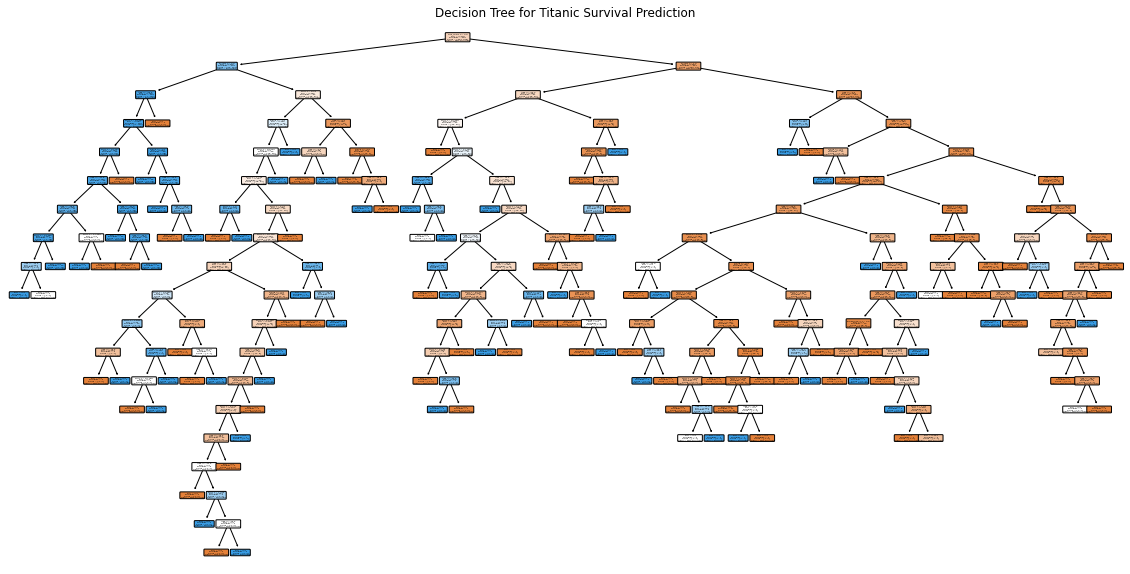

In [20]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("train.csv")

# Drop irrelevant or non-numeric columns
df = df.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin'])

# Drop rows with missing values (or use imputation instead)
df = df.dropna()

# One-hot encode categorical variables (e.g., Sex, Embarked)
df = pd.get_dummies(df, drop_first=True)

# Split features and target
X = df.drop("Survived", axis=1)
y = df["Survived"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Create and train decision tree model
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# Visualize the decision tree
plt.figure(figsize=(20, 10))
plot_tree(model, feature_names=X.columns, class_names=["Not Survived", "Survived"], filled=True, rounded=True)
plt.title("Decision Tree for Titanic Survival Prediction")
plt.show()

In [26]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.model_selection import train_test_split

df=pd.read_csv("train.csv")

df=df.drop(columns=['PassengerId','Name','Ticket','Cabin'])
df=df.dropna()

df=pd.get_dummies(df,drop_first=True)
x=df.drop("Survived",axis=1)
y=df["Survived"]

x_train,y_train,x_test,y_test=train_test_split(x,y,test_size=0.1,random_state=42)
model=DecisionTreeClassifier(random_state=42)
model.fit(x_train,y_train)

plt.figure(figsize=(8,6))
plt.plot_tree(model,feature_names=x.columns,class_names=['Not Survived','Survived'],filled=True,rounded=True)
plt.show()

ValueError: Unknown label type: continuous-multioutput. Maybe you are trying to fit a classifier, which expects discrete classes on a regression target with continuous values.

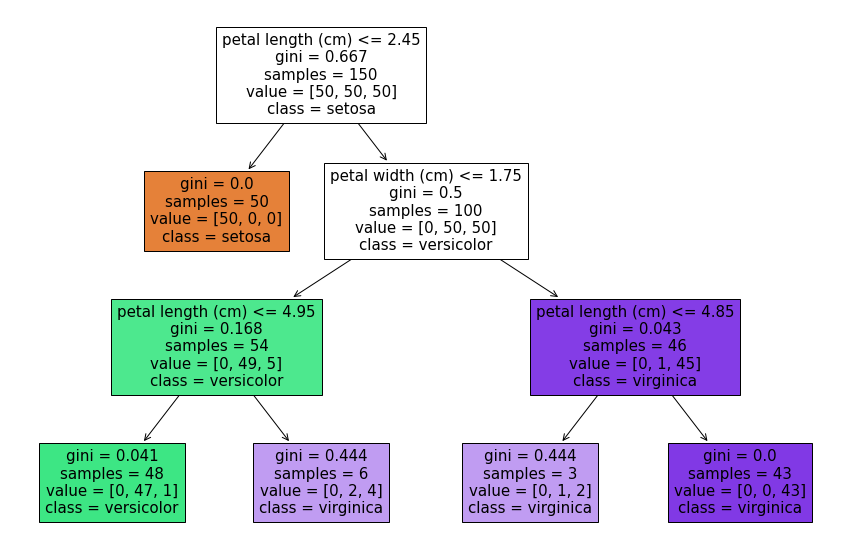

In [23]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

# Sample data
X, y = load_iris(return_X_y=True)

# Train decision tree with max_depth=3
clf = DecisionTreeClassifier(max_depth=3, random_state=42)
clf.fit(X, y)

# Plot the tree
plt.figure(figsize=(15, 10))
plot_tree(clf, filled=True, feature_names=load_iris().feature_names, class_names=load_iris().target_names)
plt.show()

In [25]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, ConfusionMatrixDisplay

# Assume these are your predictions and ground truth
# y_val = true labels from validation set
# y_pred = predicted labels by your model on validation set

# Example:
# y_pred = model.predict(X_val)

# 1. Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

y_pred=model.predict(x_test)

# 2. Accuracy
acc = accuracy_score(y_testl, y_pred)
print(f"Accuracy: {acc:.4f}")

# 3. Precision
prec = precision_score(y_test, y_pred, average='binary')  # or 'macro'/'micro'/'weighted'
print(f"Precision: {prec:.4f}")

# 4. Recall
rec = recall_score(y_test, y_pred, average='binary')
print(f"Recall: {rec:.4f}")

# 5. F1 Score
f1 = f1_score(y_test, y_pred, average='binary')
print(f"F1 Score: {f1:.4f}")

NameError: name 'y_pred' is not defined